# Classification Day 2 - Decision trees
#Machine learning with Decision trees

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
diabetes=pd.read_csv("diabetes.csv")

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Find the pattern of glucose with outcome

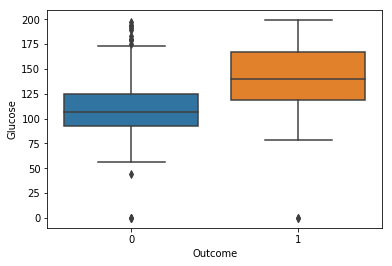

In [11]:
sns.boxplot(y=diabetes["Glucose"],x=diabetes["Outcome"])

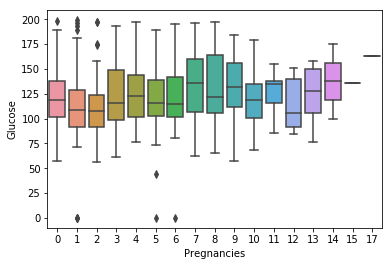

In [17]:
#preg vs glucose
sns.boxplot(x=diabetes["Pregnancies"],y=diabetes["Glucose"])

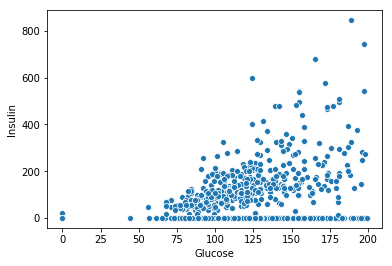

In [18]:
sns.scatterplot(x=diabetes["Glucose"],y=diabetes["Insulin"])

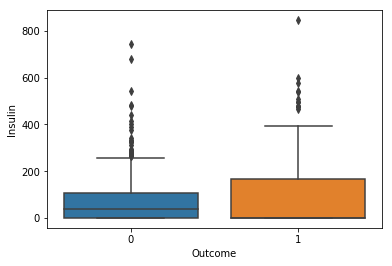

In [19]:
sns.boxplot(y=diabetes["Insulin"],x=diabetes["Outcome"])

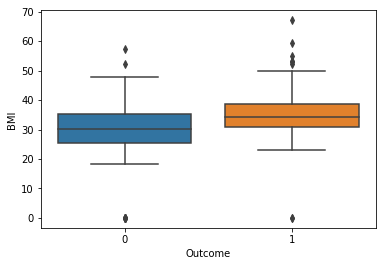

In [20]:
sns.boxplot(y=diabetes["BMI"],x=diabetes["Outcome"])

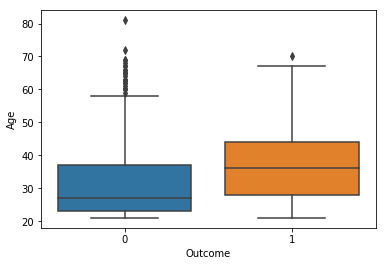

In [21]:
sns.boxplot(y=diabetes["Age"],x=diabetes["Outcome"])

In [24]:
#logistic regression
from sklearn.linear_model import LogisticRegression
#KNN
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#for scaling data
from sklearn.preprocessing import StandardScaler
#for accuracy and kappa score
from sklearn.metrics import accuracy_score, cohen_kappa_score


In [25]:
#Initiating machines
sc = StandardScaler()
lm = LogisticRegression()
knn = KNeighborsClassifier()
dtree= DecisionTreeClassifier()

In [27]:
#Standard scaling
scaled = sc.fit_transform(diabetes.drop("Outcome",axis=1))
scaled_diab= pd.DataFrame(scaled,columns=diabetes.columns[:8])
scaled_diab.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [30]:
#creating test and train
x=scaled_diab
y=diabetes["Outcome"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.30,random_state=123)

In [31]:
#Logistic Regression
lg = lm.fit(xtrain,ytrain).predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
accuracy_score(ytest,lg)

0.7965367965367965

In [33]:
cohen_kappa_score(ytest,lg)

0.5519745801180209

In [73]:
#KNN
knnM=knn.fit(xtrain,ytrain).predict(xtest)

In [74]:
accuracy_score(ytest,knnM)

0.7402597402597403

In [75]:
cohen_kappa_score(ytest,knnM)

0.42934782608695654

In [77]:
error = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knew= knn.fit(xtrain,ytrain).predict(xtest)
    error.append(np.mean(knew!=ytest))
error

[0.27705627705627706,
 0.29004329004329005,
 0.23809523809523808,
 0.2683982683982684,
 0.2597402597402597,
 0.2813852813852814,
 0.2683982683982684,
 0.29004329004329005,
 0.2683982683982684]

Text(0.5, 1.0, 'K values demystefied')

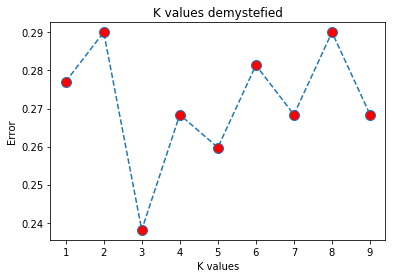

In [78]:
plt.plot(range(1,10),error,"o-",linestyle="dashed",markerfacecolor="red",markersize=10)
plt.xlabel("K values")
plt.ylabel("Error")
plt.title("K values demystefied")

In [79]:
knn= KNeighborsClassifier(n_neighbors=3)
knew=knn.fit(xtrain,ytrain).predict(xtest)


In [80]:
accuracy_score(ytest,knew)

0.7619047619047619

In [81]:
cohen_kappa_score(ytest,knew)

0.49186097668279805

#Decision Tree

In [ ]:
#Decision Tree
dtree= DecisionTreeClassifier()

In [34]:
#fit and predict
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
model_tree = dtree.predict(xtest)

In [36]:
accuracy_score(ytest,model_tree)

0.7056277056277056

In [37]:
cohen_kappa_score(ytest,model_tree)

0.37037037037037035

In [69]:
ntree=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
model_ntree= ntree.fit(xtrain,ytrain).predict(xtest)

In [71]:
accuracy_score(ytest,model_ntree)

0.7792207792207793

In [72]:
cohen_kappa_score(ytest,model_ntree)

0.5369649805447471

# # Big Sales Mart - Analytics Vidhya

In [54]:
mart_train = pd.read_csv("Train_Mart.csv")
mart_test = pd.read_csv("Test_Mart.csv")

In [55]:
mart_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [56]:
#missing values
mart_train.isnull().sum() #weight and outlet size | same for test

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


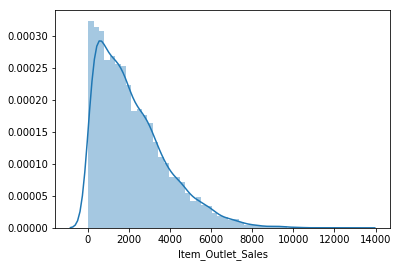

In [57]:
#Target var - Outlet sales | univariate
sns.distplot(mart_train.Item_Outlet_Sales)

In [58]:
mart_train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [59]:
mart_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

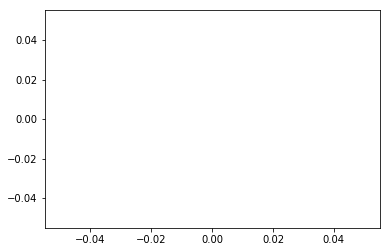

In [60]:
sns.distplot(mart_train.Item_Weight)

In [61]:
a=pd.notnull(mart_train.Item_Weight)

In [62]:
mart_train[a]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266


In [63]:
mart_train[a]["Item_Weight"]

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
5       10.395
6       13.650
8       16.200
9       19.200
10      11.800
11      18.500
12      15.100
13      17.600
14      16.350
15       9.000
16      11.800
17       9.000
19      13.350
20      18.850
22      14.600
24      13.850
25      13.000
26       7.645
27      11.650
28       5.925
30      19.250
31      18.600
32      18.700
33      17.850
34      17.500
         ...  
8492     9.300
8493     7.420
8494    15.200
8495     9.695
8496     7.420
8497    13.650
8498    15.350
8499    11.600
8500    20.350
8501     5.340
8502     8.420
8503    20.500
8505    10.500
8506    17.250
8507     5.880
8508    11.350
8509     8.100
8510    13.800
8511    17.500
8512    20.700
8513    12.000
8514    15.000
8515    20.700
8516    18.600
8517    20.750
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 7060, dtype: float64

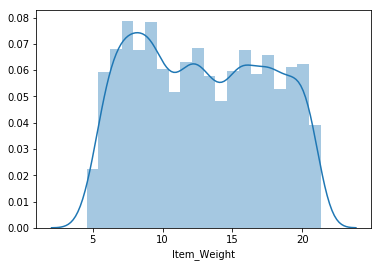

In [64]:
sns.distplot(mart_train[a]["Item_Weight"])

In [65]:
#we will fill null values


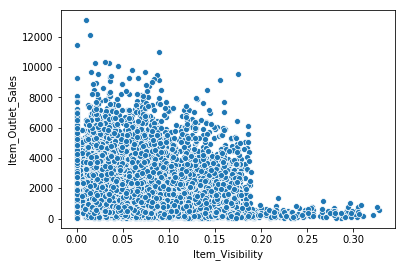

In [66]:
sns.scatterplot(x=mart_train["Item_Visibility"],y=mart_train["Item_Outlet_Sales"])
#fromthe scatter plot we can see that even though visibilty is zero its sales are still visible
# we have to improve yhis situation

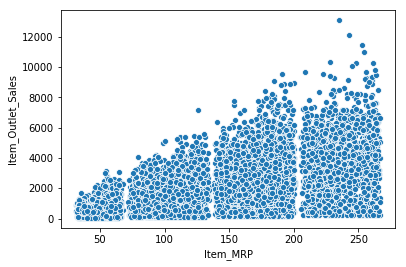

In [67]:
#plot mrp vs outlet sales
sns.scatterplot(x=mart_train["Item_MRP"],y=mart_train["Item_Outlet_Sales"])

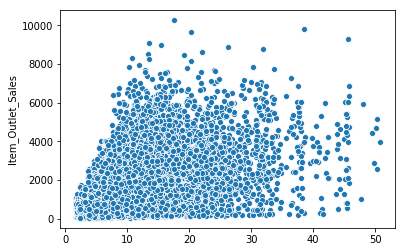

In [68]:
sns.scatterplot(x=mart_train["Item_MRP"]/mart_train["Item_Weight"],y=mart_train["Item_Outlet_Sales"])

In [57]:
#creating new variable price per unit
#mart_train["Price_Per_Unit"] = mart_train["Item_MRP"]/mart_train["Item_Weight"]

In [58]:
mart_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512


In [59]:
#mart_test["Price_Per_Unit"] = mart_test["Item_MRP"]/mart_test["Item_Weight"]

In [60]:
mart_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Price_Per_Unit
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198178
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,10.520458
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,16.558479
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,21.193985
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


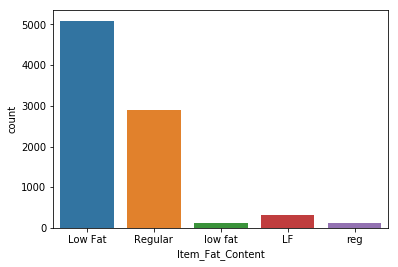

In [61]:
#item_fat content
sns.countplot(mart_train.Item_Fat_Content)

In [62]:
#mart_train_copy= mart_train

In [63]:
#mart_train_copy.Item_Fat_Content.replace(to_replace=["LF","low fat","reg"] ,value=["Low Fat","Low Fat","Regular"], inplace = True)

In [9]:
#mart_train_copy.Item_Fat_Content.value_counts()

NameError: name 'mart_train_copy' is not defined

In [69]:
mart_train.Item_Fat_Content.replace(to_replace=["LF","low fat","reg"] ,value=["Low Fat","Low Fat","Regular"], inplace = True)

In [70]:
mart_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [71]:
mart_test.Item_Fat_Content.replace(to_replace=["LF","low fat","reg"] ,value=["Low Fat","Low Fat","Regular"], inplace = True)

In [72]:
mart_test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

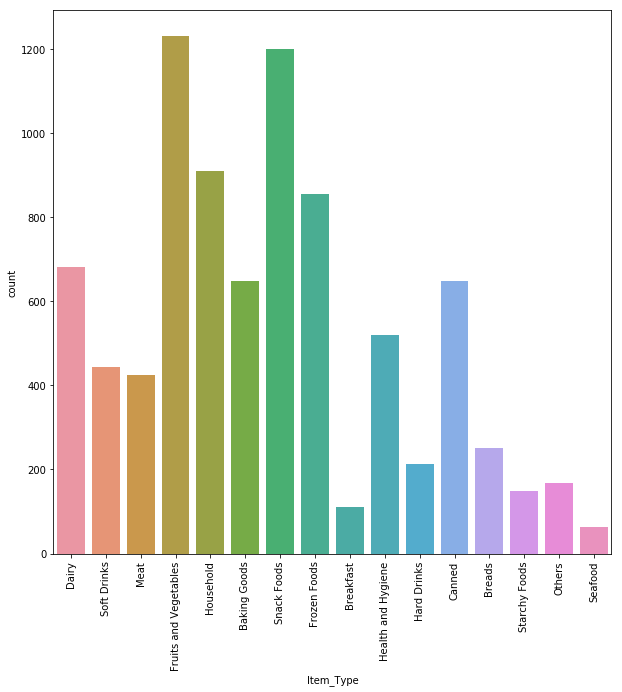

In [69]:
#item type
plt.figure(figsize=[10,10])
sns.countplot(mart_train.Item_Type)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

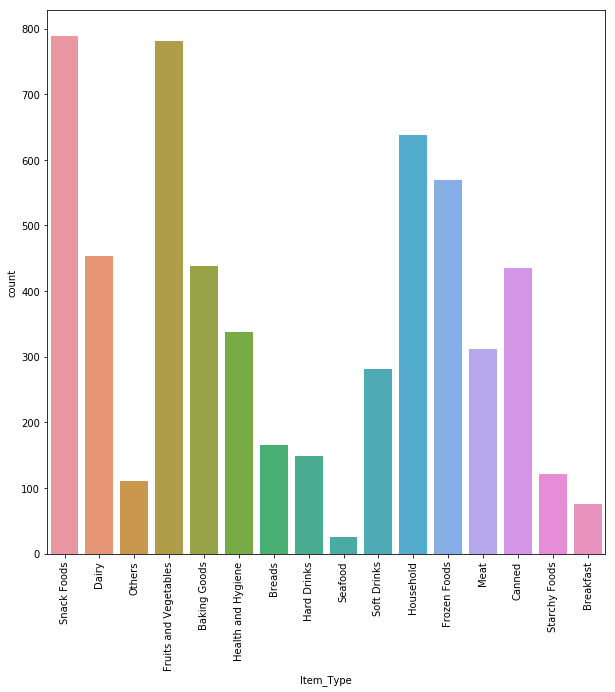

In [70]:
#test
plt.figure(figsize=[10,10])
sns.countplot(mart_test.Item_Type)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

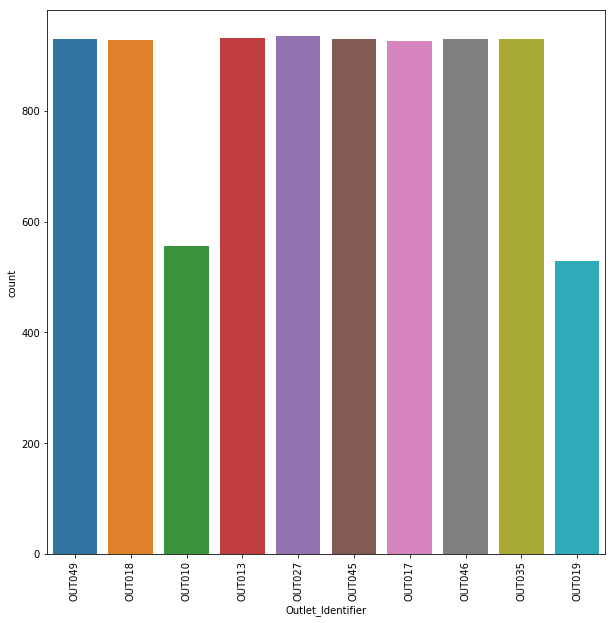

In [71]:
plt.figure(figsize=[10,10])

sns.countplot(mart_train.Outlet_Identifier)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

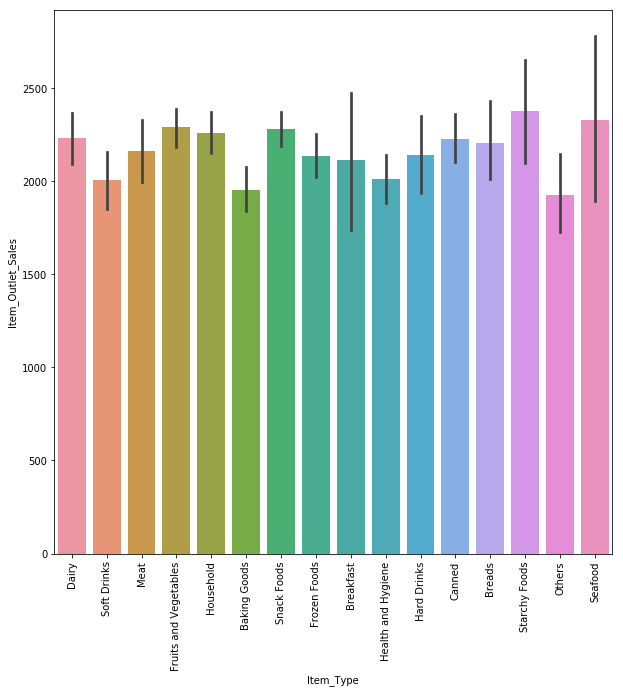

In [72]:
plt.figure(figsize=[10,10])
sns.barplot(x="Item_Type",y="Item_Outlet_Sales",data=mart_train)
plt.xticks(rotation=90)

In [73]:
#filling missing values
mart_train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [74]:
mart_train.Item_Weight.fillna(value=12.6 , inplace = True)
mart_test.Item_Weight.fillna(value=12.5 , inplace = True)

In [75]:
mart_train.Item_Visibility.replace(to_replace = 0 ,value=0.053931 , inplace = True)
mart_test.Item_Visibility.replace(to_replace = 0 ,value=0.054154 , inplace = True)

In [76]:
mart_test.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [77]:
mart_train.Outlet_Size.fillna(value="Medium", inplace = True)
mart_test.Outlet_Size.fillna(value="Medium", inplace = True)

In [78]:
mart_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [79]:
#mart_train=mart_train.drop("Price_Per_Unit", axis=1)

In [79]:
mart_train["Price_Per_Unit"]=mart_train.Item_MRP/mart_train.Item_Weight

In [81]:
#mart_test=mart_test.drop("Price_Per_Unit", axis=1)

In [80]:
mart_test["Price_Per_Unit"]=mart_test.Item_MRP/mart_test.Item_Weight

In [21]:
mart_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512


In [84]:
#newtrain = mart_train.groupby("Item_Identifier").transform(lambda x : x.fillna(x.notnull().mean()))

In [22]:
#newtrain.isnull().sum()

NameError: name 'newtrain' is not defined

In [86]:
mart_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Price_Per_Unit
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198178
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,10.520458
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,16.558479
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,21.193985
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,18.738400


In [23]:
mart_test[mart_test.Item_Identifier=="FDW58"]["Outlet_Size"]

0       Medium
253     Medium
1625    Medium
1892     Small
2166    Medium
2434    Medium
2830     Small
Name: Outlet_Size, dtype: object

In [88]:
#newtest = mart_test.groupby("Item_Identifier").transform(lambda x : x.fillna(x.notnull().mean()))

In [89]:
newtest.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Price_Per_Unit               0
dtype: int64

In [90]:
#mart_train.groupby["Outlet_Identifier"]

TypeError: 'method' object is not subscriptable

In [24]:
#feature engineering
# we can extract first 2 letters of id and we can see that it has significant relation with type

mart_train.Item_Identifier[1][0:2]

'DR'

In [81]:
itemid= []
for i in range(0,8523):
   itemid.append(mart_train.Item_Identifier[i][0:2])


In [82]:
mart_train["Item_ID"]=pd.Series(itemid)

In [83]:
mart_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit,Item_ID
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,FD
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,FD
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,NC


In [84]:
itemid= []
for i in range(0,5681):
   itemid.append(mart_test.Item_Identifier[i][0:2])


In [85]:
mart_test["Item_ID"]=pd.Series(itemid)

In [86]:
mart_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Price_Per_Unit', 'Item_ID'],
      dtype='object')

#scaling the data

In [87]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [88]:
#Deleting the ItemIDentifier from the train data
m_train=mart_train.drop("Item_Identifier" , axis=1)
m_test= mart_test.drop("Item_Identifier" , axis=1)

In [89]:
newtrain=m_train.drop("Outlet_Establishment_Year" , axis=1)

In [90]:
newtest=m_test.drop("Outlet_Establishment_Year" , axis=1)

In [35]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit,Item_ID
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,FD
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,DR
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,FD
3,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,9.484115,FD
4,8.93,Low Fat,0.053931,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,6.031512,NC


In [91]:
ohe_train=pd.get_dummies(newtrain)
ohe_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Price_Per_Unit,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_ID_DR,Item_ID_FD,Item_ID_NC
0,9.300,0.016047,249.8092,3735.1380,26.861204,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,48.2692,443.4228,8.153581,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,141.6180,2097.2700,8.092457,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.053931,182.0950,732.3800,9.484115,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.053931,53.8614,994.7052,6.031512,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5,10.395,0.053931,51.4008,556.6088,4.944762,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
6,13.650,0.012741,57.6588,343.5528,4.224088,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
7,12.600,0.127470,107.7622,4022.7636,8.552556,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
8,16.200,0.016687,96.9726,1076.5986,5.985963,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
9,19.200,0.094450,187.8214,4710.5350,9.782365,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [93]:
ohe_test.shape

(5681, 45)

In [94]:
sc=StandardScaler()
scaled_train=pd.DataFrame(sc.fit_transform(ohe_train),columns=ohe_train.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [95]:
ohe_test=pd.get_dummies(newtest)
ohe_test

,Item_Weight,Item_Visibility,Item_MRP,Price_Per_Unit,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_ID_DR,Item_ID_FD,Item_ID_NC
0,20.750,0.007565,107.8622,5.198178,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,8.300,0.038428,87.3198,10.520458,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,14.600,0.099575,241.7538,16.558479,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,7.315,0.015388,155.0340,21.193985,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,12.500,0.118599,234.2300,18.738400,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
5,9.800,0.063817,117.1492,11.954000,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
6,19.350,0.082602,50.1034,2.589323,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7,12.500,0.015782,81.0592,6.484736,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
8,6.305,0.123365,95.7436,15.185345,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
9,5.985,0.005698,186.8924,31.226800,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [39]:
ohe_train.shape

(8523, 46)

In [96]:
sc= StandardScaler()
scaled_test=pd.DataFrame(sc.fit_transform(ohe_test),columns=ohe_test.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Applying Decision Tree

In [97]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [98]:
x=scaled_train.drop("Item_Outlet_Sales",axis=1)
y=scaled_train.Item_Outlet_Sales

In [99]:
#Fitting and Predicting
dt.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [100]:
sales_pred=dt.predict(scaled_test)

In [101]:
saveit= sc.fit_transform(pd.DataFrame(m_train.Item_Outlet_Sales))

In [102]:
sales = sc.inverse_transform(sales_pred)

In [103]:
# Sales Dataframe
solution = pd.DataFrame({"Item_Identifier": mart_test.Item_Identifier, 
                        "Outlet_Identifier": mart_test.Outlet_Identifier,
                        "Item_Outlet_Sales": sales})

In [104]:
solution.head()


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2404.2038
1,FDW14,OUT017,959.4178
2,NCN55,OUT010,1775.6886
3,FDQ58,OUT017,620.5256
4,FDY38,OUT027,7170.6660


In [107]:
# export outside
solution.to_csv("Dec Tree.csv", index = False)

In [108]:
cd

C:\Users\Astha


In [105]:
from sklearn.ensemble import RandomForestRegressor


In [106]:
rf = RandomForestRegressor()
rf.fit(x,y)
rf_pred = rf.predict(scaled_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
